# 📘 SINGLE-LAYER NEURAL NETWORK FROM SCRATCH
# Approximating a simple linear function y = 3x + 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Generate Data

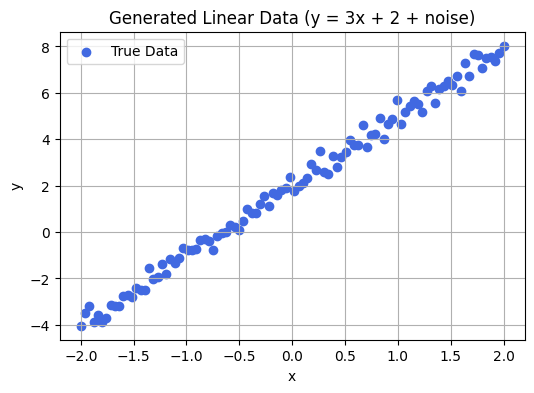

In [2]:
def generate_linear_data(n=100, slope=3.0, intercept=2.0, noise_std=0.3):
    X = np.linspace(-2, 2, n).reshape(-1, 1)
    y = slope * X + intercept + np.random.randn(n, 1) * noise_std
    return X, y

X, y = generate_linear_data()

plt.figure(figsize=(6,4))
plt.scatter(X, y, label='True Data', color='royalblue')
plt.title("Generated Linear Data (y = 3x + 2 + noise)")
plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.grid(True)
plt.show()


#Define Single-Layer NN

In [4]:
class SingleLayerNN:
    def __init__(self, in_dim, out_dim):
        self.W = np.random.randn(in_dim, out_dim) * 0.1
        self.b = np.zeros((1, out_dim))

    def forward(self, X):
        return X @ self.W + self.b

    def compute_loss(self, y_hat, y):
        return np.mean((y_hat - y)**2)

    def backward(self, X, y, y_hat, lr=0.01):
        n = X.shape[0]
        dW = (2/n) * X.T @ (y_hat - y)
        db = (2/n) * np.sum(y_hat - y, axis=0, keepdims=True)
        self.W -= lr * dW
        self.b -= lr * db

In [5]:
model = SingleLayerNN(in_dim=1, out_dim=1)
epochs = 2000
lr = 0.05
losses = []

for epoch in range(epochs):
    y_hat = model.forward(X)
    loss = model.compute_loss(y_hat, y)
    model.backward(X, y, y_hat, lr)
    losses.append(loss)
    if epoch % 200 == 0:
        print(f"Epoch {epoch}, Loss = {loss:.4f}")

print("\nLearned Parameters:")
print(f"W = {model.W[0][0]:.4f}, b = {model.b[0][0]:.4f}")


Epoch 0, Loss = 16.7627
Epoch 200, Loss = 0.0870
Epoch 400, Loss = 0.0870
Epoch 600, Loss = 0.0870
Epoch 800, Loss = 0.0870
Epoch 1000, Loss = 0.0870
Epoch 1200, Loss = 0.0870
Epoch 1400, Loss = 0.0870
Epoch 1600, Loss = 0.0870
Epoch 1800, Loss = 0.0870

Learned Parameters:
W = 2.9927, b = 1.9849


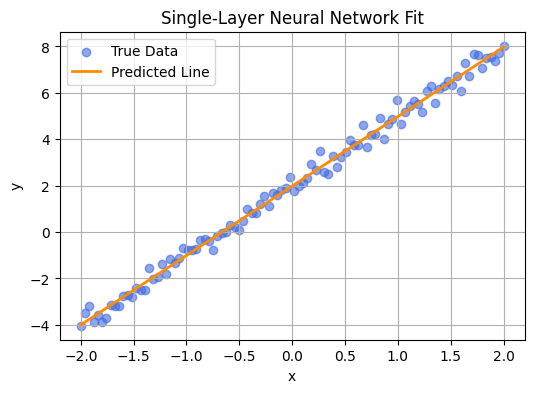

In [6]:
plt.figure(figsize=(6,4))
plt.scatter(X, y, label='True Data', color='royalblue', alpha=0.6)
plt.plot(X, model.forward(X), color='darkorange', label='Predicted Line', linewidth=2)
plt.title("Single-Layer Neural Network Fit")
plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.grid(True)
plt.show()

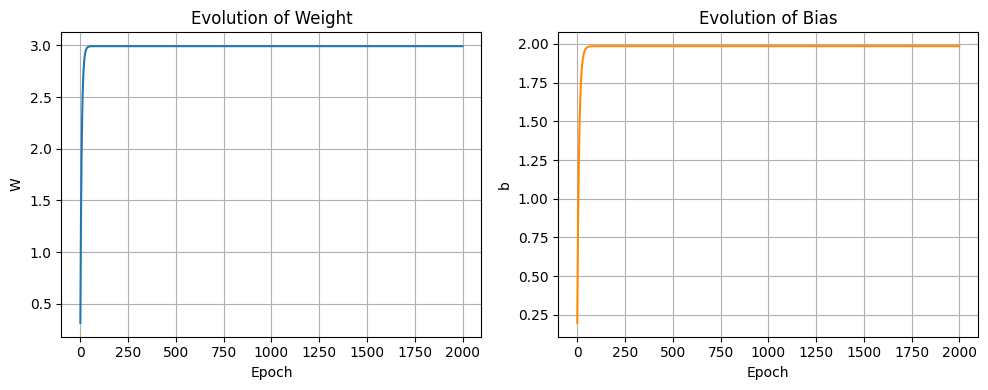

In [7]:
weights = []
biases = []

model = SingleLayerNN(1, 1)
for epoch in range(epochs):
    y_hat = model.forward(X)
    model.backward(X, y, y_hat, lr)
    weights.append(model.W[0][0])
    biases.append(model.b[0][0])


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(weights, label='Weight W')
plt.title("Evolution of Weight"); plt.xlabel("Epoch"); plt.ylabel("W")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(biases, label='Bias b', color='darkorange')
plt.title("Evolution of Bias"); plt.xlabel("Epoch"); plt.ylabel("b")
plt.grid(True)
plt.tight_layout()
plt.show()


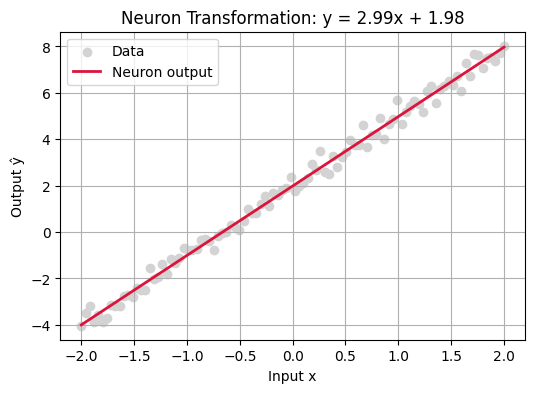

In [8]:
def visualize_neuron_action(model, X):
    plt.figure(figsize=(6,4))
    plt.scatter(X, y, color='lightgray', label='Data')
    plt.plot(X, model.forward(X), color='crimson', linewidth=2, label='Neuron output')
    plt.title(f"Neuron Transformation: y = {model.W[0][0]:.2f}x + {model.b[0][0]:.2f}")
    plt.xlabel("Input x"); plt.ylabel("Output ŷ"); plt.legend(); plt.grid(True)
    plt.show()

visualize_neuron_action(model, X)